In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

titanic = pd.read_csv('./titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continuous variables
1. Fill in missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`SibSp`, `Parch`, `PassengerId`)

In [2]:
# Fill missing for Age
titanic.isnull().sum()
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

<Figure size 432x288 with 0 Axes>

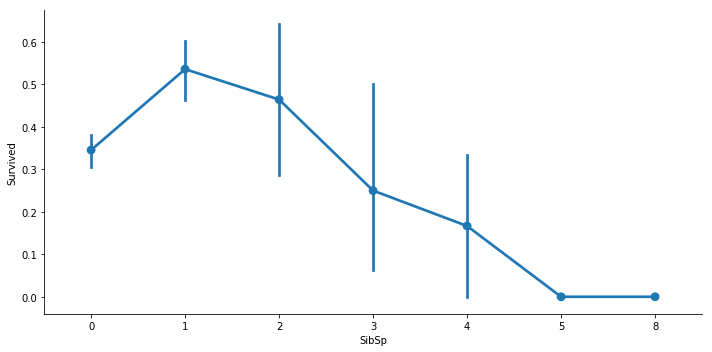

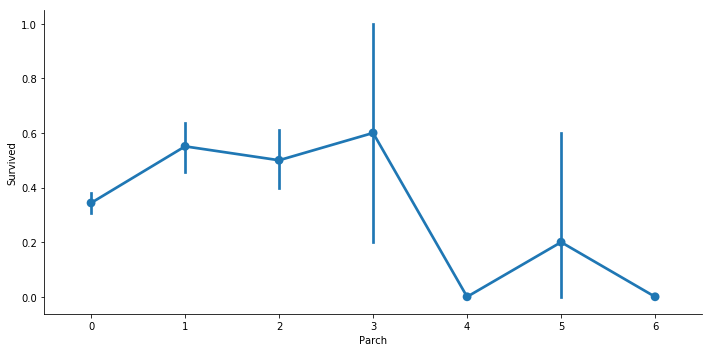

In [3]:
# Combine SibSp & Parch
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [4]:
# Drop non-important variables
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical features
1. Create an indicator variable in place of Canin
2. Convert Sex to a numeric variable
3. Drop irrelevant and repetitive variables 

In [5]:
# Creating inidcator
titanic['Cabin_indicator'] = np.where(titanic['Cabin'].isnull(),0, 1)

# Convert Sex to numeric
gender_num = {'male':0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

# Drop not needed variables
titanic.drop(['Cabin','Embarked','Name','Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_indicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [6]:
# Export the cleaned data
titanic.to_csv('./titanic_cleaned.csv')

### Split data into training, validation, testing

In [12]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

for dataset in [Y_train, Y_val, Y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


In [18]:
# Write out data
import sys
X_train.to_csv('./train_features.csv',index=False)
X_val.to_csv('./val_features.csv',index=False)
X_test.to_csv('./test_features.csv',index=False)

Y_train.to_csv('./train_labels.csv',index=False,header=False)
Y_val.to_csv('./val_labels.csv',index=False,header=False)
Y_test.to_csv('./test_labels.csv',index=False,header=False)